**Problem 1**

In [ ]:
# import libraries:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the data (code from exercise 6.1 in Machine Learning Refined, 2nd Edition):
csvname = "https://raw.githubusercontent.com/jermwatt/machine_learning_refined/gh-pages/mlrefined_datasets/superlearn_datasets/2d_classification_data_v1_entropy.csv"
data = np.loadtxt(csvname, delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(1, 11)
(1, 11)


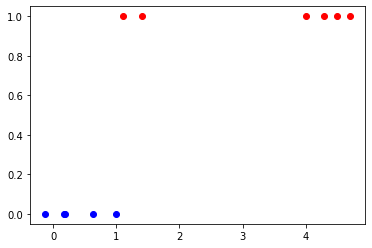

In [ ]:
# just for visualization purposes, so I know what I'm doing:
x_0 = []
x_1 = []

for i, j in zip(x.ravel(), y.ravel()):
  if j == 0:
    x_0.append(i)
  else:
    x_1.append(i)

plt.plot(x_0, [0] * len(x_0), 'bo')
plt.plot(x_1, [1] * len(x_1), 'ro')
plt.show()

In [ ]:
# define the sigmoid function:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

# define the sigmoidal least-squares function:
def sigmoid_least_squares(weights):
  # (assuming x, y are valid and of same length)
  P = x.shape[1]
  
  total = 0
  for input_value, output_value in zip(x.ravel(), y.ravel()):
    cost = sigmoid(weights[0] + (weights[1] * input_value)) - output_value
    square_cost = cost ** 2
    total += square_cost

  total /= P
  return total

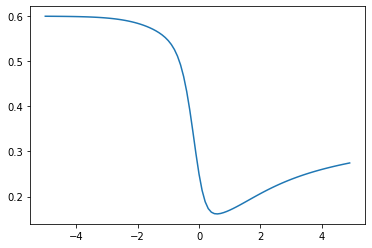

In [ ]:
# again, for visualization purposes, we plot the sigmoidal least-squares cost function (with no bias)
a = [i/10 for i in range(-50, 50)]
b = [sigmoid_least_squares([0, i]) for i in a]
plt.plot(a, b)
plt.show()

In [ ]:
# define some useful functions for gradient descent:

# partial derivative for bias term:
def pd_bias(weights, x, y):
    return -2 * np.mean(y - weights[0] - (weights[1] * x))

# partial derivative for weight term:
def pd_weight(weights, x, y):
    return -2 * np.mean(np.multiply(y - weights[0] - (weights[1] * x), x))

# calculate the magnitude of the gradient:
def gradient_mag(weights):
    return np.sqrt(np.sum(np.square(weights[0])) + np.sum(np.square(weights[1])))

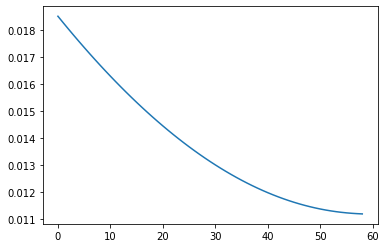

Optimal weights:  [-20.44750965561187, 19.62520119785978]


In [ ]:
# the (batch) gradient descent algorithm:
alpha   = 1e-2
epsilon = 1e-3
weights = [-20.0, 20.0]

# stores least-squares values for plotting
ls_vals = []

# *** IMPORTANT ***
# create a function that calculates the gradient of our sigmoidal least-squares function:
gradient = grad(sigmoid_least_squares)

while True:
  # store sigmoidal least-squares value for this iteration:
  ls_vals.append(sigmoid_least_squares(weights))

  # calculate the gradient and its magnitude:
  cur_gradient = gradient(weights)
  cur_gradient_mag = gradient_mag(gradient(weights))

  # calculate partial derivatives:
  cur_pd_bias = cur_gradient[0]
  cur_pd_weight = cur_gradient[1]

  # update weights accordingly:
  weights[0] -= alpha * (cur_pd_bias / cur_gradient_mag)
  weights[1] -= alpha * (cur_pd_weight / cur_gradient_mag)

  if cur_gradient_mag < epsilon:
    break

# plot sigmoidal least-square error
plt.plot(range(len(ls_vals)), ls_vals)
plt.show()
print('Optimal weights: ', weights)

**Sidenote**: It's interesting to me to investigate the difference between regular gradient descent and normalized gradient descent. In this algorithm, simply changing cur_gradient to 1 in the lines

*weights[0] -= alpha * (cur_pd_bias / cur_gradient)*

*weights[1] -= alpha * (cur_pd_weight / cur_gradient)*

converts this back to a normal gradient descent algorithm. Plotting the sigmoidal least-square errors then looks far less linear. 

**Training using normalized gradient descent takes far fewer iterations!!**

In [ ]:
# define the decision function:
def predict_probability(input_point, weights):
  return sigmoid(weights[0] + (weights[1] * input_point))

def predict(input_point, weights):
  # round() will round sigmoid to either 0 or 1
  return round(sigmoid(weights[0] + (weights[1] * input_point)))

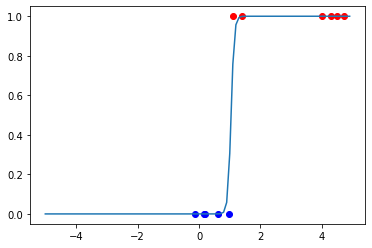

In [ ]:
# show the model's fit:
x_fit = [i/10 for i in range(-50, 50)]
y_fit = [predict_probability(input_point, [weights[0], weights[1]]) for input_point in x_fit]

plt.plot(x_0, [0] * len(x_0), 'bo')
plt.plot(x_1, [1] * len(x_1), 'ro')
plt.plot(x_fit, y_fit)
plt.show()

In [ ]:
# test the model's accuracy:
correct = 0
for i in range(x.shape[1]):
  if y[0][i] == predict(x[0][i], weights):
    correct += 1

accuracy = (correct / x.shape[1]) * 100.0
print('Model accuracy: %.2f%%' % accuracy)

Model accuracy: 100.00%


**Problem 2**

We begin with the general multi-class perceptron cost function:

$g(w_0, ..., w_{C-1}) = \frac{1}{P}\sum_{p=1}^P max_{j=0, ..., C-1}(0, x_p^T(w_j - w_{y_p}))$

When C = 2, the inner part of the summation above is:

$max_{j=0, 1}(x_p^T(w_j - w_{y_p}))$.

Expanding this, we get:

$max(x_p^T(w_0 - w_1), x_p^T(w_1 - w_0))$

= $x_p^T (max(w_0 - w_1, w_1 - w_0))$

= $x_p^T \mid w_0 - w_1 \mid$

Since $y_p \in \{-1, +1\}$, we want the value to be positive if $y_p = 1$ and negative otherwise, the following is equivalent to multiplying by $-y$ (because of the double-negatives). We can therefore write the inner summation as:

$max(0, -y_px_p^Tw)$.

Plugging into the general multi-class perceptron cost function for C = 2 (for two-class perceptron cost), we get:

$g(w) = \frac{1}{P}\sum_{p=1}^P max(0, -y_px_p^Tw)$

which is the two-class perceptron cost function.

**Problem 3**

a) 
We can replace:

$x_{11} = x_{12}$, 

$x_{21} = -x_{11}$, 

$x_{22} = -x_{11}$, 

$y_2 = -y_1$,

since those were given in the problem statement.

We begin by plugging in the given values to the Ridge regression optimization function (and eliminate the intercept $\beta_0$ since we are given that it is optimally 0). 

$(y_1 - 2x_{11}(\beta_1 + \beta_2))^2 + (-y_1 - 2x_{11}(\beta_1 + \beta_2))^2 + \lambda \sqrt{\beta_1^2 + \beta_2^2}$

b)
Expanding and simplifying the above expression, we get:

$2y_1^2 + 8x_{11}^2(\beta_1 + \beta_2)^2 + \lambda\sqrt{\beta_1^2 + \beta_2^2}$,

which is minimized when $\beta_1 = \beta_2 = 0$ and $\beta_1^2 + \beta_2^2 = 0$.

So $\beta_1 = -\beta_2$, which means $\beta_1^2 + \beta_2^2 = 2\beta_1^2 = 0$ so $\beta_1 = \beta_2 = 0$ which satisfies $\beta_1 = \beta_2$.

c) 
The only difference between the expression in (a) and LASSO is the last term, so after expanding and simplifying we get:
$2y_1^2 + 8x_{11}^2(\beta_1 + \beta_2)^2 + \lambda(\mid \beta_1 \mid + \mid \beta_2 \mid)$

d) 
From the above expression, it is clear that $\beta_1$ and $\beta_2$ may not necessarily be unique. For example consider any $\beta_1 = -\beta_2$ which will provide optimal weights.

**Problem 4**

In [ ]:
# import useful libraries:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
# get the input data:
df = pd.read_csv('https://raw.githubusercontent.com/oriyonay/RandomPublicThings/master/heart_input.csv')

In [ ]:
# ---------- Preprocessing ---------- #

# feature / label extraction:
features = df.loc[:, df.columns != 'heart disease']
labels = df[['heart disease']]

# encoding the labels:
labels = labels.replace('Yes', 1)
labels = labels.replace('No', 0)

# converting labels to a 1d array:
labels = labels.values.ravel()

# Splitting the dataframe into continuous and categorical variables:
nonnumeric = features.select_dtypes(exclude=['int64', 'float64'])
numeric = features.select_dtypes(include=['int64', 'float64'])

# Now convert nonnumeric columns to dummy columns with indicator variables:
dummies = pd.get_dummies(nonnumeric)

# Concatenate numeric inputs with (processed) nonnumeric 'dummy' table:
data = pd.concat([numeric, dummies], axis=1)

# ---------- End Preprocessing ---------- #

Now that we have the data preprocessed, we use bootstrapping to choose the right hyperparameter value for lambda ('alpha' in *sklearn*). 

We begin by defining a function that computes the AUROC values for models with different lambda values:

In [ ]:
# 4a) from the lecture notebook:
max_iter = 1e8

def lambda_aucs (model, lambda_vals, x_train, y_train, x_test, y_test):
  auc = []
  
  for lambda_ in lambda_vals:
    if model== "ridge":
      estimator = Ridge(max_iter = max_iter, alpha = lambda_)
    elif model == "lasso":
      estimator = Lasso(max_iter = max_iter, alpha = lambda_)
      
    estimator.fit(x_train, y_train)
    preds = estimator.predict(x_test)
    
    auc.append(roc_auc_score(y_test, preds))

  return auc

We can now perform bootstrapping:

In [ ]:
# constant parameters:
n_bootstraps = int(10)
n_test = int(0.2*len(data))
n_train = len(data) - n_test

lambda_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

aucs = {"ridge": [], "lasso": []}

for _ in range(n_bootstraps):
  train_test_indicator = np.asarray([True]*n_train + [False]*n_test)
  np.random.shuffle(train_test_indicator)

  x_train = data[train_test_indicator]
  x_test = data[np.logical_not(train_test_indicator)]
  y_train = labels[train_test_indicator]
  y_test = labels[np.logical_not(train_test_indicator)]

  ridge_lambda_auc = lambda_aucs("ridge", lambda_vals, x_train, y_train, x_test, y_test)
  lasso_lambda_auc = lambda_aucs("lasso", lambda_vals, x_train, y_train, x_test, y_test)
    
  aucs["ridge"].append(ridge_lambda_auc)
  aucs["lasso"].append(lasso_lambda_auc)

Now we print the mean AUROC values for each lambda:

In [ ]:
ridge_aucs = pd.DataFrame(aucs["ridge"])
lasso_aucs = pd.DataFrame(aucs["lasso"])

print("ridge mean AUCs:")
for lambda_val, ridge_auc in zip(lambda_vals, ridge_aucs.mean()):
  print (lambda_val, "AUC:", "%.2f"%ridge_auc)
    
    
print("\nlasso mean AUCs:")
for lambda_val, lasso_auc in zip(lambda_vals, lasso_aucs.mean()):
  print (lambda_val, "AUC:", "%.2f"%lasso_auc)

ridge mean AUCs:
0.001 AUC: 0.90
0.01 AUC: 0.90
0.1 AUC: 0.90
1 AUC: 0.90
10.0 AUC: 0.90
100.0 AUC: 0.91
1000.0 AUC: 0.80

lasso mean AUCs:
0.001 AUC: 0.90
0.01 AUC: 0.90
0.1 AUC: 0.78
1 AUC: 0.73
10.0 AUC: 0.50
100.0 AUC: 0.50
1000.0 AUC: 0.50


In [ ]:
# get the lambda values that got the highest AUROC value:
best_lambda_ridge = lambda_vals[np.argmax(ridge_aucs.mean())]
best_lambda_lasso = lambda_vals[np.argmax(lasso_aucs.mean())]

print('Best lambda for ridge regression: ', best_lambda_ridge)
print('Best lambda for lasso regression: ', best_lambda_lasso)

Best lambda for ridge regression:  100.0
Best lambda for lasso regression:  0.01


In [ ]:
# split the dataset into training and testing sets:
train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(
        data, labels, test_size = 0.2)

In [ ]:
# create ridge and lasso logistic regression models with best lambdas:
ridge_classifier = Ridge(max_iter=max_iter, alpha=best_lambda_ridge)
lasso_classifier = Lasso(max_iter=max_iter, alpha=best_lambda_lasso)

# fit the models on the data:
ridge_classifier.fit(train_inputs, train_outputs)
lasso_classifier.fit(train_inputs, train_outputs)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

4b) Now we can print the coefficients for both models:

In [ ]:
print('Coefficients from logistic regression:')
print(ridge_classifier.coef_)
print()
print('Coefficients from linear regression:')
print(lasso_classifier.coef_)

Coefficients from logistic regression:
[-0.00206932  0.00234793  0.00085828 -0.00402088  0.03816198  0.11030135
  0.04793248 -0.04793248  0.07343295 -0.01405851 -0.03443574 -0.0249387
  0.00698687 -0.00698687  0.02030629 -0.00013228 -0.02017401 -0.0429795
  0.0429795  -0.00312501  0.02663955 -0.02351454 -0.00197783 -0.06670294
  0.06868077]

Coefficients from linear regression:
[-2.71963832e-03  2.36098854e-03  7.38410103e-04 -2.94337580e-03
  2.81051997e-02  1.47026773e-01  1.15975754e-01 -5.11201283e-16
  1.88295494e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.46909256e-02 -8.26687749e-02  1.83778656e-16  0.00000000e+00
  2.61297452e-02 -2.14908088e-02 -0.00000000e+00 -6.68979983e-02
  1.31046863e-01]


Interestingly enough, the coefficients are almost identical, with the exception of the zeroed-out values in the LASSO model. This is because ridge regression will never zero-out coefficients while LASSO does. Other than that, their optimization process is the same which explains the similarity in coefficient values.

In [ ]:
# Plotting the ROC curve for both models:

# recalculate linear predictions (since we rounded it previously):
ridge_predictions = ridge_classifier.predict(test_inputs)
lasso_predictions = lasso_classifier.predict(test_inputs)

# test different thresholds:
fpr_list_ridge = []
tpr_list_ridge = []
fpr_list_lasso = []
tpr_list_lasso = []

for i in range(0, 101):
  threshold = i/100
  # predict using this threshold:
  temp_predictions_ridge = [1 if j > threshold else 0 for j in ridge_predictions]
  temp_predictions_lasso = [1 if j > threshold else 0 for j in lasso_predictions]
  
  # append fpr list and tpr list:
  fpr_temp, tpr_temp, _ = roc_curve(test_outputs, temp_predictions_ridge)
  fpr_list_ridge.append(fpr_temp)
  tpr_list_ridge.append(tpr_temp)

  fpr_temp, tpr_temp, _ = roc_curve(test_outputs, temp_predictions_lasso)
  fpr_list_lasso.append(fpr_temp)
  tpr_list_lasso.append(tpr_temp)

In [ ]:
# for some reason, the true-positive and false-positive rate lists are 3-dimensional,
# so we fix this:

tpr_ridge = [i[1] for i in tpr_list_ridge]
fpr_ridge = [i[1] for i in fpr_list_ridge]

tpr_lasso = [i[1] for i in tpr_list_lasso]
fpr_lasso = [i[1] for i in fpr_list_lasso]

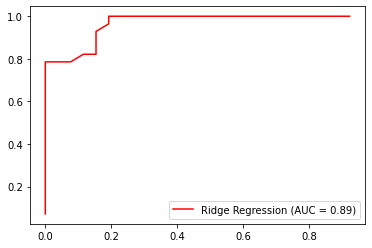

In [ ]:
# 4c) plot the ROC curve for ridge regression:
plt.plot(fpr_ridge, tpr_ridge, color='red', label='Ridge Regression (AUC = %.2f)' % auc(fpr_ridge, tpr_ridge))
plt.legend()
plt.show()

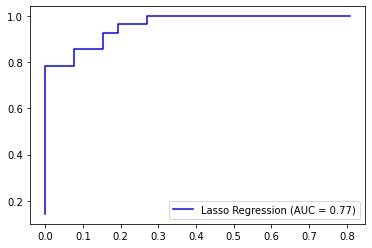

In [ ]:
# plot the ROC curve for lasso regression:
plt.plot(fpr_lasso, tpr_lasso, color='blue', label='Lasso Regression (AUC = %.2f)' % auc(fpr_lasso, tpr_lasso))
plt.legend()
plt.show()

4d) In this case (as compared to the case in Homework 2), the ROC for lasso is lower than that of ridge regression. This is because lasso is probably eliminating some useful features that ridge regression isn't.

**Problem 5**

In [ ]:
# import useful libraries:
import urllib.request
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [ ]:
# load the dataset files from URL:
TRAINING_DATASET_URL = 'https://raw.githubusercontent.com/oriyonay/RandomPublicThings/master/satimage.scale.tr'
VALIDATION_DATASET_URL = 'https://raw.githubusercontent.com/oriyonay/RandomPublicThings/master/satimage.scale.val'

training_data_file = urllib.request.urlopen(TRAINING_DATASET_URL)
validation_data_file = urllib.request.urlopen(VALIDATION_DATASET_URL)

# parse the data files:
training_data_inputs = []
training_data_labels = []
validation_data_inputs = []
validation_data_labels = []

for line in training_data_file.readlines():
  parsed_row = [float(i.split(':')[1]) for i in line.decode("utf-8").split()[1:]]
  # some data rows are missing 1/2 elements, so we 'drop' them by skipping them altogether:
  if len(parsed_row) == 36:
    training_data_inputs.append(parsed_row)
    training_data_labels.append(int(line.decode("utf-8").split()[0]))

for line in validation_data_file.readlines():
  parsed_row = [float(i.split(':')[1]) for i in line.decode("utf-8").split()[1:]]
  # some data rows are missing 1/2 elements, so we 'drop' them by skipping them altogether:
  if len(parsed_row) == 36:
    validation_data_inputs.append(parsed_row)
    validation_data_labels.append(int(line.decode("utf-8").split()[0]))

In [ ]:
# 5a) Normalizing the data using the center-and-scale approach shown in lecture:
# NOTE: this is done with as few lines of code as possible - NOT meant to be efficient!
def normalize(data):
  # calculate mean, standard deviation:
  flattened = []
  for row in data:
    flattened.extend(row)

  data_mean = np.mean(flattened)
  data_var = np.var(flattened)

  # now we normalize the data in-place:
  for row in range(len(data)):
    for col in range(len(data[row])):
      data[row][col] -= data_mean
      data[row][col] /= data_var

In [ ]:
# normalize data:
normalize(training_data_inputs)
normalize(validation_data_inputs)

In [ ]:
# 5b) 
# first, we need to convert our labels into binary outputs:
training_data_labels = [0 if i != 6 else 1 for i in training_data_labels]
validation_data_labels = [0 if i != 6 else 1 for i in validation_data_labels]

In [ ]:
# convert training data into Pandas DataFrames for convenience:
training_data_inputs = pd.DataFrame(training_data_inputs)
training_data_labels = pd.DataFrame(training_data_labels)
validation_data_inputs = pd.DataFrame(validation_data_inputs)
validation_data_labels = pd.DataFrame(validation_data_labels)

In [ ]:
# exhaustively search through degree and C parameters, while performing 10-fold stratified cross-validation.
# keep track of scores for each model:
num_of_folds = 10
params = {'degree': [1, 2, 3, 4], 'C': [1e-1, 1, 1e1, 1e2, 1e3]}

my_svc = SVC(kernel='poly')
my_svc = GridSearchCV(estimator=my_svc, param_grid=params, 
                      cv=num_of_folds, return_train_score=True,
                      refit=True)
my_svc.fit(training_data_inputs, training_data_labels.values.ravel())

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10.0, 100.0, 1000.0],
                         'degree': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
# re-generate parameter combination list (in order they were tested by the grid search function):
cv_params = []
for C in params['C']:
  for degree in params['degree']:
    cv_params.append((C, degree))

# extract data from cross-validation results:
std_train_scores = my_svc.cv_results_['std_train_score']
mean_train_scores = my_svc.cv_results_['mean_train_score']

In [ ]:
# create data to plot:
# (note: this is just a quick and easy way to extract this data. 
#  efficiency is not key here).
C = params['C']
train_scores_degree_1 = [mean_train_scores[i] if i % 4 == 0 else None for i in range(len(mean_train_scores))]
train_scores_degree_2 = [mean_train_scores[i] if i % 4 == 1 else None for i in range(len(mean_train_scores))]
train_scores_degree_3 = [mean_train_scores[i] if i % 4 == 2 else None for i in range(len(mean_train_scores))]
train_scores_degree_4 = [mean_train_scores[i] if i % 4 == 3 else None for i in range(len(mean_train_scores))]

std_train_scores_degree_1 = [std_train_scores[i] if i % 4 == 0 else None for i in range(len(std_train_scores))]
std_train_scores_degree_2 = [std_train_scores[i] if i % 4 == 1 else None for i in range(len(std_train_scores))]
std_train_scores_degree_3 = [std_train_scores[i] if i % 4 == 2 else None for i in range(len(std_train_scores))]
std_train_scores_degree_4 = [std_train_scores[i] if i % 4 == 3 else None for i in range(len(std_train_scores))]

train_scores_degree_1 = list(filter(None, train_scores_degree_1))
train_scores_degree_2 = list(filter(None, train_scores_degree_2))
train_scores_degree_3 = list(filter(None, train_scores_degree_3))
train_scores_degree_4 = list(filter(None, train_scores_degree_4))

std_train_scores_degree_1 = list(filter(None, std_train_scores_degree_1))
std_train_scores_degree_2 = list(filter(None, std_train_scores_degree_2))
std_train_scores_degree_3 = list(filter(None, std_train_scores_degree_3))
std_train_scores_degree_4 = list(filter(None, std_train_scores_degree_4))

# add one standard deviation to train scores:
ts_plus_one_std_1 = [i + j for i, j in zip(train_scores_degree_1, std_train_scores_degree_1)]
ts_plus_one_std_2 = [i + j for i, j in zip(train_scores_degree_2, std_train_scores_degree_2)]
ts_plus_one_std_3 = [i + j for i, j in zip(train_scores_degree_3, std_train_scores_degree_3)]
ts_plus_one_std_4 = [i + j for i, j in zip(train_scores_degree_4, std_train_scores_degree_4)]

ts_minus_one_std_1 = [i - j for i, j in zip(train_scores_degree_1, std_train_scores_degree_1)]
ts_minus_one_std_2 = [i - j for i, j in zip(train_scores_degree_2, std_train_scores_degree_2)]
ts_minus_one_std_3 = [i - j for i, j in zip(train_scores_degree_3, std_train_scores_degree_3)]
ts_minus_one_std_4 = [i - j for i, j in zip(train_scores_degree_4, std_train_scores_degree_4)]


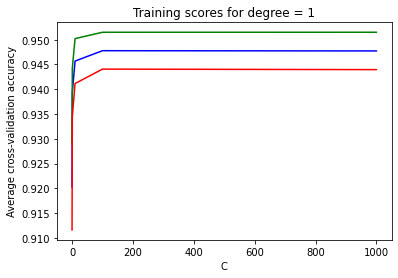

In [ ]:
# plot data for degree 1:
plt.plot(C, train_scores_degree_1, color='blue')
plt.plot(C, ts_plus_one_std_1, color='green')
plt.plot(C, ts_minus_one_std_1, color='red')
plt.title('Training scores for degree = 1')
plt.xlabel('C')
plt.ylabel('Average cross-validation accuracy')
plt.show()

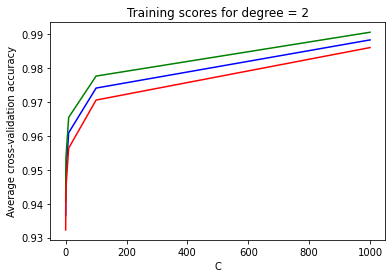

In [ ]:
# plot data for degree 2:
plt.plot(C, train_scores_degree_2, color='blue')
plt.plot(C, ts_plus_one_std_2, color='green')
plt.plot(C, ts_minus_one_std_2, color='red')
plt.title('Training scores for degree = 2')
plt.xlabel('C')
plt.ylabel('Average cross-validation accuracy')
plt.show()

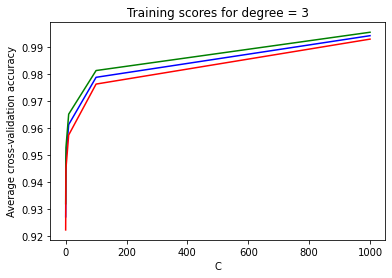

In [ ]:
# plot data for degree 3:
plt.plot(C, train_scores_degree_3, color='blue')
plt.plot(C, ts_plus_one_std_3, color='green')
plt.plot(C, ts_minus_one_std_3, color='red')
plt.title('Training scores for degree = 3')
plt.xlabel('C')
plt.ylabel('Average cross-validation accuracy')
plt.show()

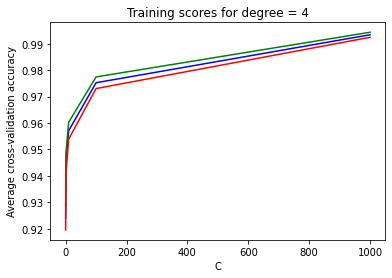

In [ ]:
# plot data for degree 4:
plt.plot(C, train_scores_degree_4, color='blue')
plt.plot(C, ts_plus_one_std_4, color='green')
plt.plot(C, ts_minus_one_std_4, color='red')
plt.title('Training scores for degree = 4')
plt.xlabel('C')
plt.ylabel('Average cross-validation accuracy')
plt.show()

In [ ]:
# Output the best degree and C-value found:
print(my_svc.best_params_)

{'C': 100.0, 'degree': 2}


In [ ]:
# 5c) 
# find the best C for every degree:
best_C_values = {} # best_C_values[d] = best C value for degree d
best_C_values[1] = C[np.argmax(train_scores_degree_1)]
best_C_values[2] = C[np.argmax(train_scores_degree_2)]
best_C_values[3] = C[np.argmax(train_scores_degree_3)]
best_C_values[4] = C[np.argmax(train_scores_degree_4)]

In [ ]:
# train models with those C values:
best_pair_models = []
for degree in params['degree']:
  my_svc_temp = SVC(C=best_C_values[degree], kernel='poly', degree=degree)
  my_svc_temp.fit(training_data_inputs, training_data_labels.values.ravel())
  best_pair_models.append(my_svc_temp)

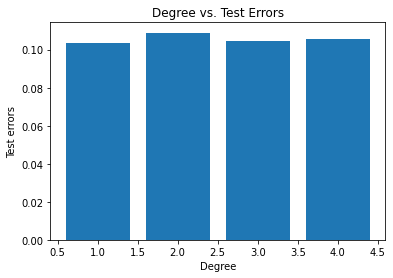

In [ ]:
# plot the test errors for each model:
degrees = params['degree']
test_errors = []

# predict values on testing set for each model:
for i in range(len(degrees)):
  # use the model to predict values:
  pred = best_pair_models[i].predict(validation_data_inputs)

  # get the accuracy score and store it in test_errors:
  # (note: 1 - accuracy score = test error)
  test_errors.append(1 - accuracy_score(validation_data_labels, pred))

# plot the test errors:
plt.bar(degrees, test_errors)
plt.title('Degree vs. Test Errors')
plt.xlabel('Degree')
plt.ylabel('Test errors')
plt.show()

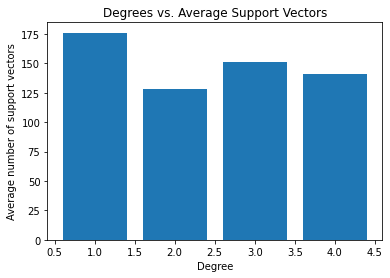

In [ ]:
# 5d)
# get the average number of support vectors from each model:
avg_support_vectors = []
for i in range(len(degrees)):
  avg_support_vectors.append(np.mean(best_pair_models[i].n_support_))

# plot average support vectors vs. degree:
plt.bar(degrees, avg_support_vectors)
plt.title('Degrees vs. Average Support Vectors')
plt.xlabel('Degree')
plt.ylabel('Average number of support vectors')
plt.show()

In [ ]:
# 5e) get the number of support vectors from each model:
num_support_vectors = []
for cur_model in best_pair_models:
  num_support_vectors.append(np.mean(cur_model.support_vectors_))

print('number of support vectors: ', num_support_vectors)

number of support vectors:  [-0.7263545084278996, -0.4408218666366317, -0.325674128843114, -0.2932469663121076]


So on average, we have anywhere from a $\frac{1}{3}$ to $\frac{2}{3}$ support vectors on the margin hyperplanes, with a max of around 5 support vectors on a hyperplane.

5f) As the polynomial degree increases, the model becomes more flexible with its boundaries. The number of support vectors decrease and the margin size increases.

5g) The $\gamma$ parameter softens the margin (so the fit is usually less accurate on the training data but is better overall (more general). This means that a higher $\gamma$ means more support vectors and a higher margin size.